In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sms = pd.read_csv('data/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [ ]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis = 1,inplace=True)

In [ ]:
sms.columns = ['label','message']

sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.isnull().sum()

label      0
message    0
dtype: int64

There are no null values present in the data

In [ ]:

empty = []

for i,label,msg in sms.itertuples():
    if type(sms)==str:
        if sms.isspace():
            empty.append(i)

print(f"There are {len(empty)} empty string as message")

There are 0 empty string as message


ham     4825
spam     747
Name: label, dtype: int64




<AxesSubplot:xlabel='label', ylabel='count'>

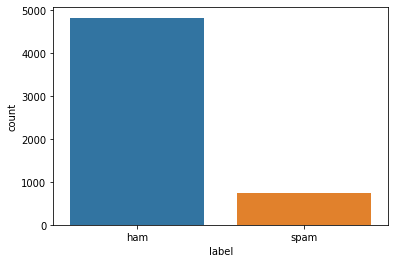

In [ ]:
print(sms['label'].value_counts())
print('\n')
sns.countplot(x='label',data=sms)

In [ ]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


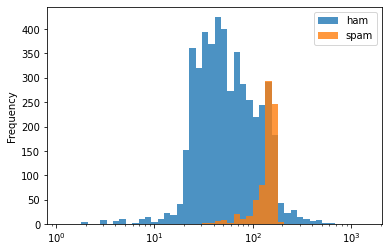

In [ ]:
plt.xscale('log')
bins= 1.16**np.arange(1,50)

sms[sms['label']=='ham']['length'].plot(kind='hist',bins=bins,alpha=0.8)
sms[sms['label']=='spam']['length'].plot(kind='hist',bins=bins,alpha=0.8)

plt.legend(['ham','spam'])

In [ ]:
import string

def remove_punct(text):
    new_text = ''
    for char in text:
        if char in string.punctuation:
            continue
        else:
            new_text += char
    return new_text


single_message = sms['message'][0]

print('message before removing the punctuation:')
print('\n')
print(single_message)
print('\n')
print('message after removing the punctuation:')
print()
print(remove_punct(single_message))

message before removing the punctuation:


Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


message after removing the punctuation:

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat


In [ ]:
sms['message'] = sms['message'].apply(remove_punct)

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
p_stemmer = PorterStemmer()

def stemming(text):
    text = text.split(' ') 
    text = [p_stemmer.stem(word) for word in text]
    
    return text
    
single_message = sms['message'][4]

print('message before stemming:')
print('\n')
print(single_message)
print('\n')
print('message after stemming:')
print()
print(stemming(single_message))

message before stemming:


Nah I dont think he goes to usf he lives around here though


message after stemming:

['nah', 'I', 'dont', 'think', 'he', 'goe', 'to', 'usf', 'he', 'live', 'around', 'here', 'though']


Check how 'goes' became 'goe' and 'lives' became 'live'. We will keep the message in the form of list for sometime. We will convert it back to text for creating the model

In [ ]:
sms['message'] = sms['message'].apply(stemming)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords.words('english')]
    
    
    return ' '.join(text)


single_message = sms['message'][4]

print('message before removing the stopwords:')
print('\n')
print(single_message)
print('\n')
print('message after removing the stopwords:')
print()
print(remove_stopwords(single_message))

message before removing the stopwords:


['nah', 'I', 'dont', 'think', 'he', 'goe', 'to', 'usf', 'he', 'live', 'around', 'here', 'though']


message after removing the stopwords:

nah I dont think goe usf live around though


In [ ]:
sms['message'] = sms['message'].apply(remove_stopwords)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
X = sms['message']
y = sms['label']

encoded_y = pd.get_dummies(y,drop_first=True).values.reshape(-1,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,encoded_y,test_size=0.25)

In [ ]:
logistic = Pipeline([
    ('vector',TfidfVectorizer()),
    ('classifier',LogisticRegression())
])

logistic.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
predict_log = logistic.predict(X_test)

Accuracy of logistic model is 95.55%


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1192
           1       0.98      0.71      0.82       201

    accuracy                           0.96      1393
   macro avg       0.97      0.85      0.90      1393
weighted avg       0.96      0.96      0.95      1393





[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

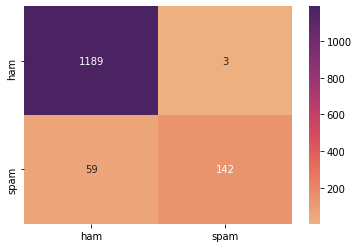

In [ ]:
acc_log = accuracy_score(y_test,predict_log)
print(f"Accuracy of logistic model is {np.round(acc_log*100,2)}%")
print('\n')
print(classification_report(y_test,predict_log))
print('\n')

ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict_log),annot = True,cmap='flare',fmt='g',ax=ax)

ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])

In [ ]:
naive = Pipeline([
    ('vector',TfidfVectorizer()),
    ('classifier',MultinomialNB())
])

naive.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [ ]:
predict_naive = naive.predict(X_test)

Accuracy of naive bayes model is 95.55%


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1192
           1       1.00      0.66      0.79       201

    accuracy                           0.95      1393
   macro avg       0.97      0.83      0.88      1393
weighted avg       0.95      0.95      0.95      1393





[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

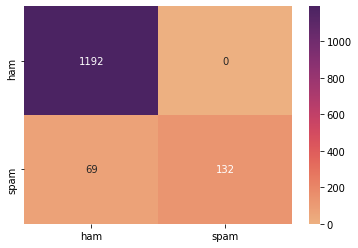

In [ ]:
acc_naive = accuracy_score(y_test,predict_log)
print(f"Accuracy of naive bayes model is {np.round(acc_naive*100,2)}%")
print('\n')
print(classification_report(y_test,predict_naive))
print('\n')

ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict_naive),annot = True,cmap='flare',fmt='g',ax=ax)

ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])

In [ ]:
svc = Pipeline([
    ('vector',TfidfVectorizer()),
    ('classifier',LinearSVC())
])

svc.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer()), ('classifier', LinearSVC())])

In [ ]:
predict_svc = svc.predict(X_test)

Accuracy of svc model is 97.85%


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1192
           1       0.98      0.87      0.92       201

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393





[Text(0, 0.5, 'ham'), Text(0, 1.5, 'spam')]

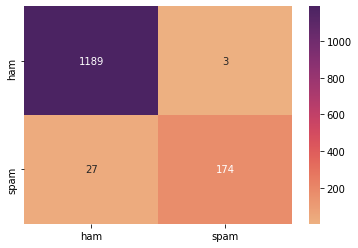

In [ ]:
acc_svc = accuracy_score(y_test,predict_svc)
print(f"Accuracy of svc model is {np.round(acc_svc*100,2)}%")
print('\n')
print(classification_report(y_test,predict_svc))
print('\n')

ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict_svc),annot = True,cmap='flare',fmt='g',ax=ax)

ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])